* The Jupyter(ipynb) file contains the entire code. However, it is recommended you break down code into
multiple file components such as data.py, train.py, test.py, model.py, evaluation.py. for your production code. 
This file is for demo purpose only.

# Motive for the project :

In the world where we are nearing to Huxley nighmare of bombardment of information where information has no value, we would want mechanism to identify the relevant content.

## Project: 
Identify fake jobs postings from jobs posted online.  

    
## Data Set :
http://emscad.samos.aegean.gr/

## Stakeholders: 
   1) Individual looking for jobs.
   
   2) Professional networking and job posting sites.
              
              
              
              
        

  
    


# My Approach

## A) Statistical Analysis 
   For understanding the data which includes but not limited to

   1) Data distribution
   
   2) Correlations between variables
   
   3) Understanding if the causality exists
   
   4) Understanding the domain of the data to see how to handle missing values which includes
        
       i)  deciding the threshold of missing values

       ii) use mean, mode, median or a fixed value 

       iii) Missing Values can have meaning as well, don't just ignore them blindly

## B) Building a Machine Learning model
   
   1) What kind of problem are we trying to solve? For eg. Is it Regression/ Classification?
   
   2) Identify the state of art models,libraries and work on them.
   
   2) Understand if those model make a difference than the basic approach and by what factor.

## C) Findings from the data manipulations
   I will try to explore with below things in mind. 
   
   1)  Open Interpretation about findings from data analysis and model evaluation.
   
   2)  Are there any recommendations to business?
      
   3)  What did you learn from the entire process?
   
   4) Is the alogrithm biased? For example Social Biases of race, gender, sexuality, and ethnicity

Please refer to https://medium.com/better-programming/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d
to read why we use numpy instead of python lists for numerical computations.

In [48]:

import numpy as np
import pandas as pd

In [49]:
df=pd.read_csv("fake_job_postings.csv")

# check if data is loaded.
df.sample (frac=0.02)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
366,367,Sales Director,"US, IL, Chicago",NaN,NaN,Visual BI is one of the leading and fastest gr...,City / Location : Any Hub City in the USA Join...,"New Business Development• Prospect, qualify an...",Salary and bonus commensurate with experience....,1,1,1,Full-time,Director,Associate Degree,Information Technology and Services,Sales,0
12488,12489,Truck Driver - CDL Truck Driver - Truck Drivin...,"US, CA, Apple Valley",NaN,NaN,Hawkeye Recruitment provides cost effective re...,FAIRCHILD FREIGHT LLC. NEEDS TEN (10) OWNER OP...,Class A CDL required (any state),NaN,0,1,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,0
4325,4326,Call Center Supervisor,"US, VA, Virginia Beach",NaN,NaN,Tidewater Finance Co. was established in 1992 ...,"Tidewater Finance Company, located in Virginia...",Qualified candidates should possess the follow...,Our company offers a competitive salary plus B...,0,1,1,Full-time,Associate,Unspecified,Financial Services,Management,0
6957,6958,Front End Developer,"US, NY, NY",NaN,70000-100000,Sharewave is the best way for private companie...,Your mission at Sharewave will be to enhance o...,You should have: experience using AngularJS ...,Every employee receives generous equity compen...,0,1,1,Full-time,NaN,NaN,NaN,NaN,0
13750,13751,Administration Assistant,"GR, I, Athens",NaN,NaN,PCCW Global is the international operating div...,The successful candidate will be responsible f...,University Degreeage - maximum 30 years old Mi...,extra language aptitude wil be considered a plus,0,1,0,Full-time,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5821,5822,College Marketing Rep (SEATTLE),"US, WA, Seattle",Marketing,0-0,BIGGER MARKETS is a college marketing agency t...,Bigger Markets “Bigmemes” are the heart and so...,Must be in CollegeAMA member is helpful but no...,Awesome payInteresting campaigns with high end...,0,1,1,Contract,Entry level,Some College Coursework Completed,Marketing and Advertising,Marketing,0
3043,3044,Marketing Coordinator,"US, MN, Hopkins",NaN,NaN,"Shippers Supply, Inc., founded in 1928, is an ...",ObjectiveThe Marketing Coordinator’s primary r...,Education and Experience:A two year degree wit...,Compensation + Incentives + Profit Sharing Ins...,0,1,1,Full-time,Associate,Associate Degree,Wholesale,Marketing,0
12906,12907,Sr. Network Engineer,"US, CA, Pleasanton",NaN,NaN,NaN,Job Title: Sr. Network EngineerLocation: Plea...,Additional Notes:• Top 3-5 MUST HAVE technical...,NaN,0,0,0,Contract,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
4247,4248,Graduates: English Teacher Abroad (Conversatio...,"US, MA, Springfield",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,Entry level,Bachelor's Degree,Education Management,Education,0


In [50]:
'''
As we cannot see all the columns in the intial data display, we will transpose the rows and columns
with a custom function
'''
def transposed_display(df):
     with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
              display(df)
#               df.head(5)

In [51]:

transposed_display(df.tail().transpose())

,17875,17876,17877,17878,17879
job_id,17876,17877,17878,17879,17880
title,Account Director - Distribution,Payroll Accountant,Project Cost Control Staff Engineer - Cost Con...,Graphic Designer,Web Application Developers
location,"CA, ON, Toronto","US, PA, Philadelphia","US, TX, Houston","NG, LA, Lagos","NZ, N, Wellington"
department,Sales,Accounting,NaN,NaN,Engineering
salary_range,NaN,NaN,NaN,NaN,NaN
company_profile,Vend is looking for some awesome new talent to...,WebLinc is the e-commerce platform and service...,We Provide Full Time Permanent Positions for m...,NaN,Vend is looking for some awesome new talent to...
description,Just in case this is the first time you’ve vis...,The Payroll Accountant will focus primarily on...,Experienced Project Cost Control Staff Enginee...,Nemsia Studios is looking for an experienced v...,Who are we?Vend is an award winning web based ...
requirements,To ace this role you:Will eat comprehensive St...,- B.A. or B.S. in Accounting- Desire to have f...,At least 12 years professional experience.Abil...,1. Must be fluent in the latest versions of Co...,We want to hear from you if:You have an in-dep...
benefits,What can you expect from us?We have an open cu...,Health &amp; WellnessMedical planPrescription ...,NaN,Competitive salary (compensation will be based...,NaN
telecommuting,0,0,0,0,0


In [52]:
# check the dimensions of the data (rows and columsn)
df.shape

(17880, 18)


  # Statistical Analysis
  
  
  Please refer to my article https://medium.com/@sandeeptimilsina/before-you-jump-into-modelling-2ca5b727dac2 
  
  1 ) Think about the model. 
  
  2 ) State the hypothesised relationships between a dependent variable and casual factors as specifically possible. 
      Are they theoritically plausible?
      
  3 ) Does the job title indicate the job is fradulent?
       job title along doesn't indicate the job is fradulent.fradulent =f(title,other predictors)
       other attributes that alone don't define if the job is fradulent--location, department, salary_range,benefits
       
       




In [53]:
# Understanding the datatypes tells us more about the nature of the data
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [54]:
# Missing data
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [55]:
#setting threshold for imputation at 40 percent
df.isna().sum() / len(df)

job_id                 0.000000
title                  0.000000
location               0.019351
department             0.645805
salary_range           0.839597
company_profile        0.185011
description            0.000056
requirements           0.150727
benefits               0.403244
telecommuting          0.000000
has_company_logo       0.000000
has_questions          0.000000
employment_type        0.194128
required_experience    0.394295
required_education     0.453300
industry               0.274217
function               0.361018
fraudulent             0.000000
dtype: float64

In [56]:
df.columns[df.isnull().mean() < 0.4]

Index(['job_id', 'title', 'location', 'company_profile', 'description',
       'requirements', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [57]:
# drop those columns that have the threshold > 40 % department, salary_rang and benifits
# job_id is removed as this is online job posting 

df['job_id'].dtypes
df.drop(['salary_range', 'job_id', 'department', 'benefits'], axis = 1, inplace = True)



Though I have hardcoded the columns, it is wise to automate the drop. 
Basic rule of programming is not to hardcode.
This code is for analysis through jupyter notebook for understanding purpose only.

df.drop([df.columns[df.isnull().mean() < 0.4]])

In [58]:
"""Extracting Text Featurs"""

text_df = df[["title", "company_profile", "description", "requirements","fraudulent"]]
text_df = text_df.fillna(' ')

text_df.head()

,title,company_profile,description,requirements,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0


In [59]:
"""Catagorical Feature"""
cat_df = df[["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education", "industry", "function","fraudulent"]]
cat_df = cat_df.fillna("None")

cat_df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,0,Other,Internship,None,None,Marketing,0
1,0,1,0,Full-time,Not Applicable,None,Marketing and Advertising,Customer Service,0
2,0,1,0,None,None,None,None,None,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# Visualizations of target
You can either use seaborn or matplotlib, I have gone with both.

In [60]:
# seeing the distribution of the target variable
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

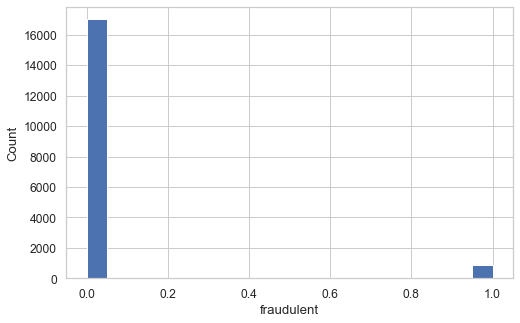

In [61]:
#visualization seaborn
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['fraudulent'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='fraudulent', ylabel='Count');

 


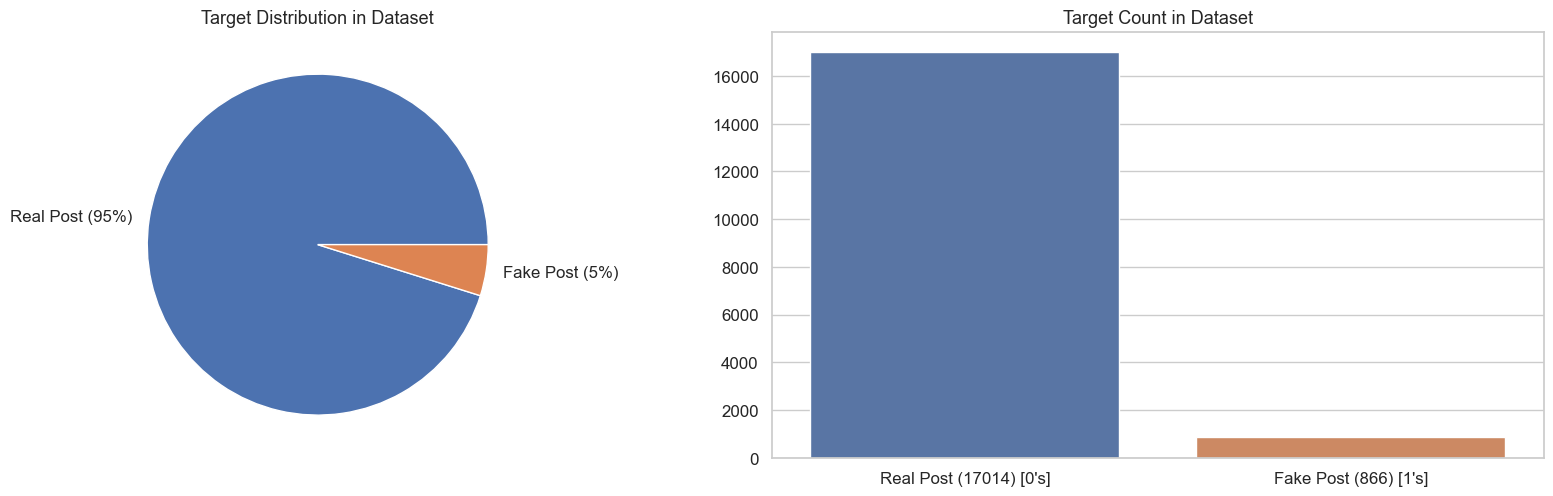

In [62]:
#visualization using matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

df["fraudulent"].value_counts().plot(kind='pie', ax=axes[0], labels=['Real Post (95%)', 'Fake Post (5%)'])
temp = df["fraudulent"].value_counts()
sns.barplot(temp.index, temp, ax=axes[1])

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xticklabels(["Real Post (17014) [0's]", "Fake Post (866) [1's]"])

axes[0].set_title('Target Distribution in Dataset', fontsize=13)
axes[1].set_title('Target Count in Dataset', fontsize=13)

plt.show()

### Conclussion: The target variable is highly imbalanced. Mostly skewed towards "not a fradulent job posting".

There are multiple ways to handle imbalanced datasets.https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

One of the judgement calls to be made here is do we want to introduce artifical data?

Let's try to see description(the columns with the most character) in glance via word cloud.

Wall time: 40.3 s


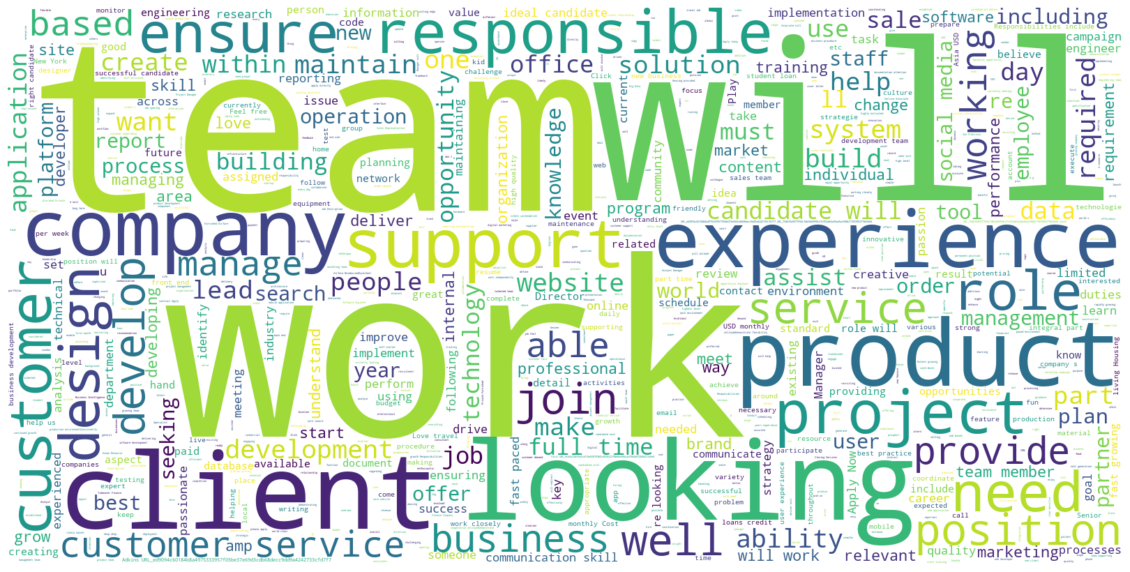

In [63]:
%%time

# word cloud visualization based on the frequency
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = "white", stopwords=stopwords, width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.fraudulent == 0]['description']))
plt.axis("off")
plt.imshow(wc , interpolation = 'bilinear')
plt.savefig('no_fraud_cloud.jpeg')


We can see work, team, will, looking project, experience, product, company as the most frequent terms.
These are terms that you mostly see on the job postings.

1) Can we assing weightage to specific words?
for e.g Work does make sense compared to words like " WILL" and "Looking".

2) Will removing those words affect the model performace?
Based on previous experience, I know you have to be very careful when you have to remove most frequent words aka stop words.

for example :  “I told you that she was not happy”.
             removing stop words=> [told,happy] overall meaning is directly opposite of what we intent.
             
Please refer: https://medium.com/@limavallantin/why-is-removing-stop-words-not-always-a-good-idea-c8d35bd77214




In [64]:
# We will concatenate text columns together. But why?
# Because the text columns together can provide us more context and it is easier to tokenize and other text operations.

df['text'] = df['title'] + ' ' + df['location'] + ' ' + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' '  + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function'] 

In [65]:
df['text']

0                                                      NaN
1                                                      NaN
2                                                      NaN
3        Account Executive - Washington DC US, DC, Wash...
4        Bill Review Manager US, FL, Fort Worth  SpotSo...
                               ...                        
17875                                                  NaN
17876    Payroll Accountant US, PA, Philadelphia  WebLi...
17877                                                  NaN
17878                                                  NaN
17879                                                  NaN
Name: text, Length: 17880, dtype: object

# Understanding how the features are correlated to other features and to the target

<AxesSubplot:>

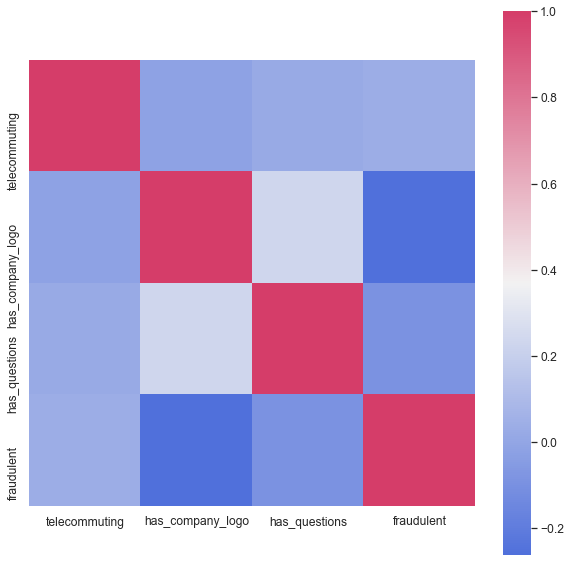

In [66]:
plt.figure(figsize = (10,10))
corr = df.corr()
sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True)

## What are the most frequent types of jobs that are being posted ?

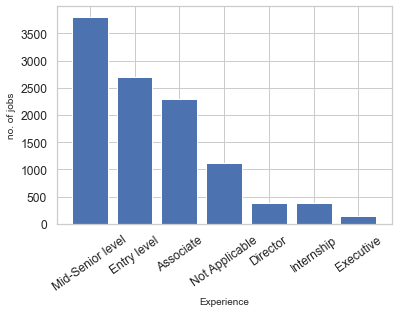

In [68]:
experience = dict(df.required_experience.value_counts())
plt.bar(experience.keys(), experience.values())
plt.xlabel('Experience', size=10)
plt.ylabel('no. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

##  Where are the jobs located?   Which countries are associated to most of the fake jobs?


country,AE,AL,AM,AR,AT,AU,BD,BE,BG,BH,BR,BY,CA,CH,CL,CM,CN,CO,CY,CZ,DE,DK,EE,EG,ES,FI,FR,GB,GH,GR,HK,HR,HU,ID,IE,IL,IN,IQ,IS,IT,JM,JP,KE,KH,KR,KW,KZ,LK,LT,LU,LV,MA,MT,MU,MX,MY,NG,NI,NL,NO,NZ,PA,PE,PH,PK,PL,PT,QA,RO,RS,RU,SA,SD,SE,SG,SI,SK,SV,TH,TN,TR,TT,TW,UA,UG,US,VI,VN,ZA,ZM
fraudulent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,53,1,2,9,14,174,2,117,17,4,35,9,445,15,2,1,15,1,11,6,383,42,71,51,65,29,70,2361,1,940,77,1,14,12,114,72,272,10,2,31,1,20,7,1,10,2,1,2,23,9,6,1,13,14,18,9,10,4,127,8,333,9,1,131,26,73,18,15,46,7,20,14,1,49,80,1,2,1,10,2,17,4,2,13,1,9926,3,4,39,2
1,1,0,0,0,0,40,0,0,0,5,1,0,12,0,0,0,0,0,0,0,0,0,1,1,1,0,0,23,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,1,1,3,0,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,730,0,0,1,0


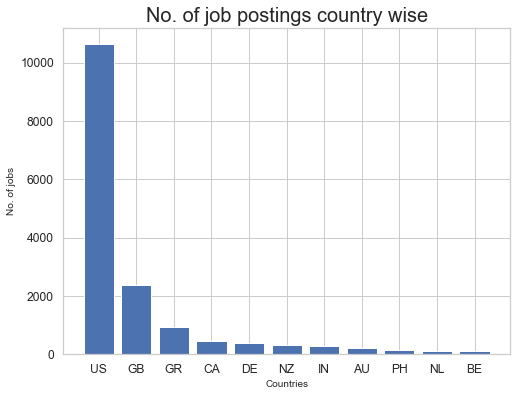

In [106]:
def extract_country(location):

    l = location.split(',')
    return l[0]

df = df[df['location'].notnull()]
df['country'] = df.location.apply(extract_country)
country = dict(df.country.value_counts()[:11])

plt.figure(figsize=(8,6))
plt.title('No. of job postings country wise', size=20)
plt.bar(country.keys(), country.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

# We use crosstab to deal with categorical values
pd.set_option('display.max_columns', None)
ct = pd.crosstab(df.country,df.fraudulent)
ct.transpose()



In [20]:
# Remove the text based columns as we have taken "text" column aggregting all those columns

df.drop(['title', 'location', 'company_profile', 'description', 'requirements',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'], axis = 1, inplace = True)

# Natural Language Processing
 We are analyzing the job postings to see if the jobs are fake or not.

 It is NLP problem. We will try to use most widely used practises of NLP and try to implement algorithms or models that helps
 us in achieving higher accuracy.
 
 I am going with BERT(Bidirectional Encoder Representations from Transformers).
 For more info please refer to https://arxiv.org/abs/1810.04805

In [21]:
new_text = text_df[text_df.columns[0:-1]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
target = df['fraudulent']

In [22]:
new_text

0        Marketing Intern,We're Food52, and we've creat...
1        Customer Service - Cloud Video Production,90 S...
2        Commissioning Machinery Assistant (CMA),Valor ...
3        Account Executive - Washington DC,Our passion ...
4        Bill Review Manager,SpotSource Solutions LLC i...
                               ...                        
17875    Account Director - Distribution ,Vend is looki...
17876    Payroll Accountant,WebLinc is the e-commerce p...
17877    Project Cost Control Staff Engineer - Cost Con...
17878    Graphic Designer, ,Nemsia Studios is looking f...
17879    Web Application Developers,Vend is looking for...
Length: 17880, dtype: object

Cleaning the text to apply NLP algorithms

In [23]:
%%time
import re
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


# Applying the cleaning function to both test and training datasets
new_text = new_text.apply(lambda x: clean_text(x))
new_text.head(3)

# #go for batch processing if the system takes time
batch1 = new_text[:6000]
target1 = target[:6000]
# target1.value_counts()

Wall time: 17.6 s


# We are opting for DistilBert instead of BERT.
 
Why?

DistilBERT is a small, fast, cheap and light Transformer model trained by distilling BERT base.
It has 40% less parameters than bert-base-uncased, runs 60% faster
while preserving over 95% of BERT’s performances as measured on the GLUE language understanding benchmark.

For more info please refer: https://huggingface.co/transformers/model_doc/distilbert.html#:~:text=DistilBERT%20is%20a%20small%2C%20fast,the%20GLUE%20language%20understanding%20benchmark.

In [24]:
# importing the tools 
# if you have trouble installing pytorch you can download from 
# pip install https://download.pytorch.org/whl/cu101/torch-1.4.0-cp38-cp38-win_amd64.whl
# install the transformers library from huggingface.

import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [25]:
%%time
# DistilBERT from hugging face
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Wall time: 3.81 s


In [26]:
%%time
# Tokenization

tokenized = batch1.apply((lambda x: tokenizer.encode(x, max_length = 60, add_special_tokens=False)))
tokenized.shape

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Wall time: 2min 20s


(6000,)

In [27]:
%%time
# Padding ==> convert 1D array to 2D array
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
np.array(padded).shape

Wall time: 119 ms


(6000, 60)

In [28]:
%%time
# Masking ==>  ignore (mask) the padding we've added
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

Wall time: 3.63 ms


(6000, 60)

In [29]:
%%time
# Deep Learning
# input_ids = torch.tensor(padded)  
input_ids = torch.tensor(padded).to(torch.int64)
# attention_mask = torch.tensor(attention_mask)

attention_mask = torch.tensor(attention_mask).to(torch.int64)


with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

last_hidden_states[0].shape

Wall time: 4min 50s


torch.Size([6000, 60, 768])

In [30]:
features = last_hidden_states[0][:,0,:].numpy()
labels = target1

# Model Exploration 
Using scikit- learn...https://scikit-learn.org/stable/

In [31]:
# model 
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,KFold, cross_val_score

train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [32]:
train_features

array([[ 0.07119945,  0.06349375,  0.31577125, ..., -0.5823691 ,
         0.26505455, -0.329486  ],
       [ 0.1749608 ,  0.0074163 ,  0.27470726, ..., -0.26871902,
         0.17526585, -0.1417119 ],
       [ 0.15630233,  0.28517875,  0.27886525, ..., -0.5958711 ,
         0.03328631, -0.08194949],
       ...,
       [ 0.2785994 ,  0.17424347,  0.16155362, ..., -0.37230858,
         0.06098267, -0.10127281],
       [ 0.04481076,  0.1986384 ,  0.13886373, ..., -0.3968617 ,
         0.13555905,  0.01445785],
       [ 0.22094873,  0.19103126,  0.13755748, ..., -0.03717862,
         0.06221712,  0.02567974]], dtype=float32)

In [33]:
# We will try to play around with different models and compare their performance
Model_Score = []
Model_Name = []


In [34]:
%%time

# train default para
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB
# TODO : ValueError: Negative values in data passed to MultinomialNB (input X)

# Using Random Forest Classifer for classification into fradulent/not fradulent
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
n_estimators_range = [1, 2, 4, 8, 16, 32, 64, 100, 200]
param_grid_rf = dict(n_estimators = n_estimators_range)
lr_clf = GridSearchCV(rf, param_grid_rf, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

lr_clf.fit(train_features, train_labels)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.0min finished


Wall time: 2min 56s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200]},
             scoring='roc_auc', verbose=1)

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

log_reg_pred = lr_clf.predict(test_features)
print("Confusion matrix")
print (confusion_matrix(test_labels, log_reg_pred))
print("")
print("Classification Report")
print (classification_report(test_labels, log_reg_pred))

Confusion matrix
[[1436    0]
 [  37   27]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1436
           1       1.00      0.42      0.59        64

    accuracy                           0.98      1500
   macro avg       0.99      0.71      0.79      1500
weighted avg       0.98      0.98      0.97      1500



In [36]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 
print (roc_auc_score(test_labels, log_reg_pred))

# metrics.plot_roc_curve(lr_clf,test_labels, log_reg_pred)

Model_Name.append('Random Forest')
Model_Score.append(round(roc_auc_score(test_labels, log_reg_pred), 4))

0.7109375


In [37]:
# Using Logistic Regression to classify

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
c_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
penalty_options = ['l1', 'l2']

param_grid = dict(C = c_values, penalty = penalty_options)

In [38]:
from sklearn.model_selection import GridSearchCV

grid_logi = GridSearchCV(log_reg, param_grid = param_grid, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose=1)
grid_logi.fit(train_features, train_labels)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   31.1s finished


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [40]:
# getting best parameters
print("best parameters")
print (grid_logi.best_params_)
print("")
print("best score")
print(grid_logi.best_score_)

best parameters
{'C': 1, 'penalty': 'l2'}

best score
0.9411018709158911


In [42]:
log_reg_pred = grid_logi.predict(test_features)
print (roc_auc_score(test_labels, log_reg_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, log_reg_pred)

print (classification_report(test_labels, log_reg_pred))

Model_Name.append('Logistic_Regression')
Model_Score.append(round(roc_auc_score(test_labels, log_reg_pred), 4))


0.7539824164345404
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1436
           1       0.75      0.52      0.61        64

    accuracy                           0.97      1500
   macro avg       0.86      0.75      0.80      1500
weighted avg       0.97      0.97      0.97      1500



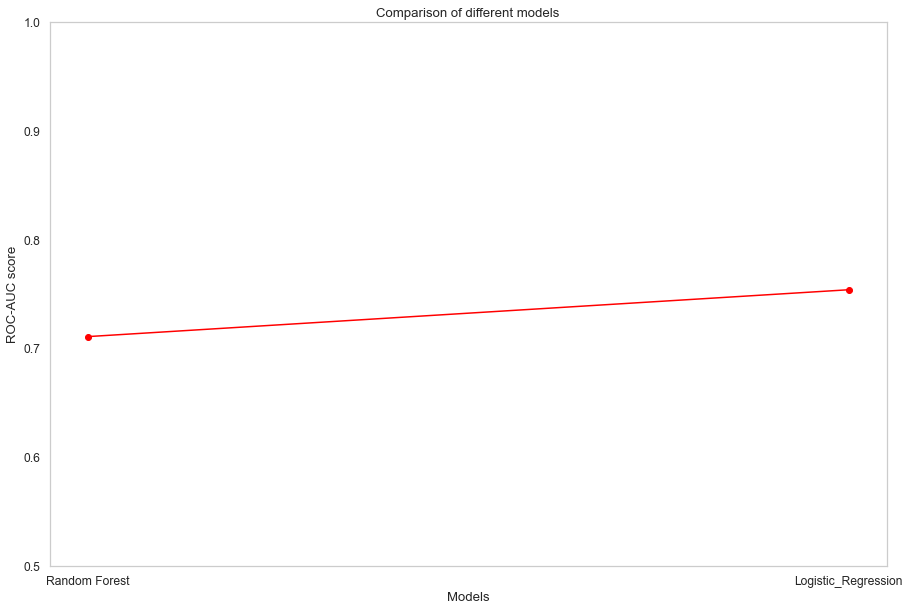

In [43]:
plt.figure(figsize = (15, 10))
plt.plot(Model_Name,Model_Score, marker = 'o', color = 'red')
plt.title('Comparison of different models')
plt.xlabel('Models')
plt.ylabel('ROC-AUC score')
plt.ylim(0.5, 1.0)
plt.grid()
plt.savefig('Model_compare.jpeg')
plt.show()

# Evaluation of the results


* Data is imbalanced. You could still have 95 percent accuracy as the data is highly imbalanced.
  We need more data to have confidence in our model. Accuracy doesn't really matter on imbalanced    dataset.
  
* Random Forest has the higher accuracy and low ROC-AUC score compared to logistic regression.
  You calculate accuracy on the predicted classes while you calculate ROC AUC on predicted scores
  
* We chose Logistic Regression over Random Forest for its higher ROC-AUC Score even though Random forest has the higher accuracy because ROC-AUC will only actually select for models that achieve false positive and true positive rates that are significantly above random chance, which is not guaranteed for accuracy.

* Social bias parameters like race, gender, sexuality, and ethnicity not calculated because no data was present.

  

# Lastly 

I ran into couple of issues while using multiple packages because of version compatibility.
There is no standard approach to dealing with this except for understanding the error log and doing a google search for a solution if required.

This problem was meant for me to dig deep into data analysis and nlp and hence i wont be building an UI or dockerizing the code.